<a href="https://colab.research.google.com/github/veeragowri/task/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('/content/sample_data/Iris.csv')
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


In [5]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [6]:
X = df.drop(columns=['Species']).values
y = df['Species'].values

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_vis = X_scaled[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

In [9]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

K = 1 | Accuracy = 0.71


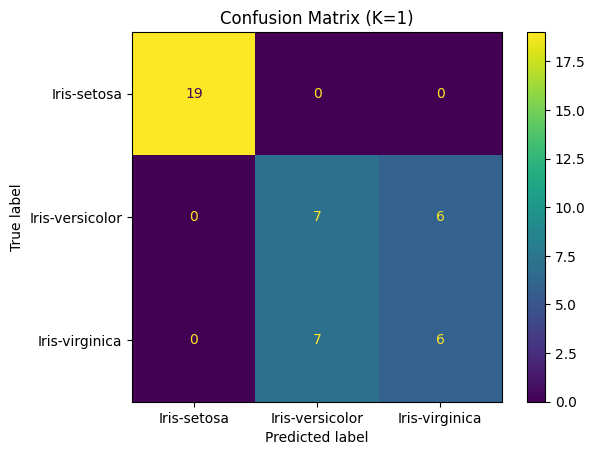

K = 3 | Accuracy = 0.80


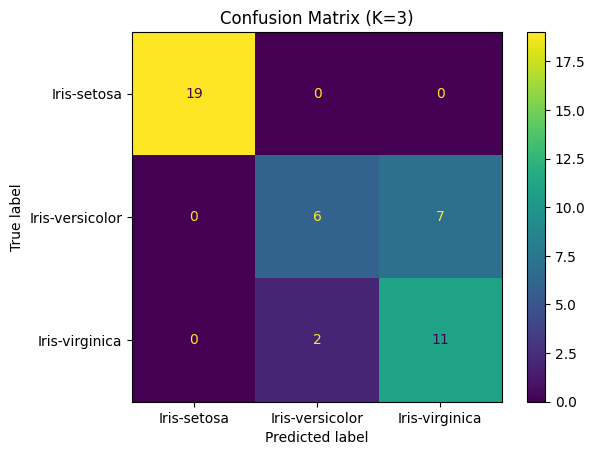

K = 5 | Accuracy = 0.80


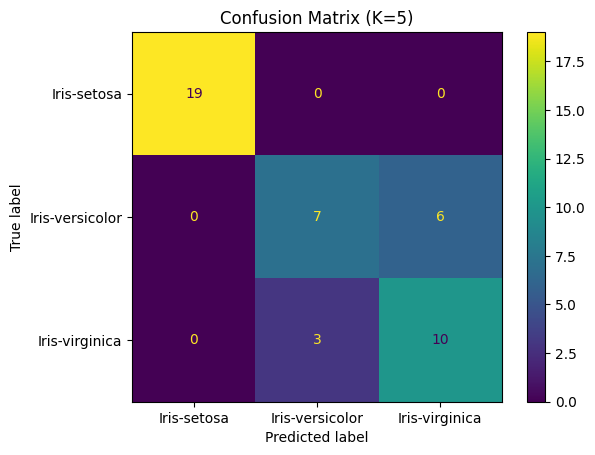

K = 7 | Accuracy = 0.80


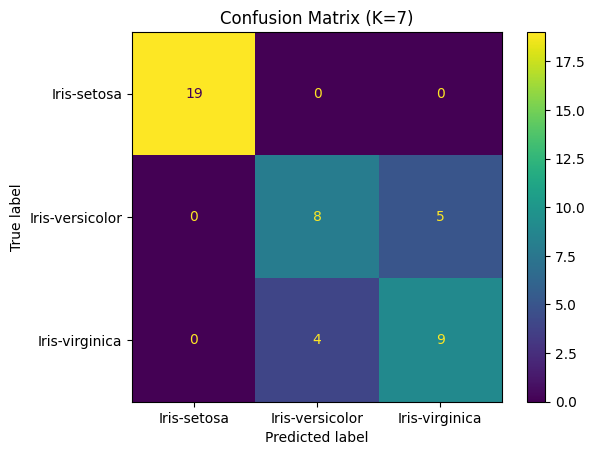

K = 9 | Accuracy = 0.82


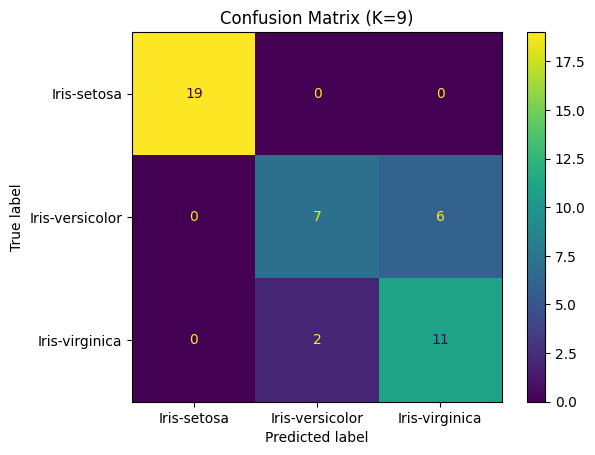

In [21]:
accuracies = []

for k in k_values:
    try:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        print(f"K = {k} | Accuracy = {acc:.2f}")
        disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=le.classes_)
        disp.plot()
        plt.title(f"Confusion Matrix (K={k})")
        plt.show()

    except Exception as e:
        print(f"Error with K={k}: {e}")
        accuracies.append(np.nan)


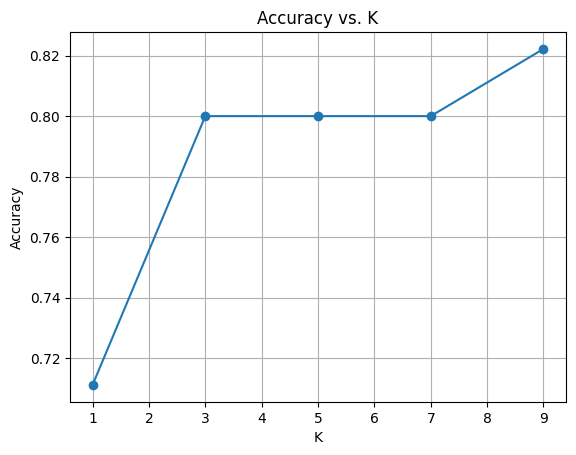

In [22]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [23]:
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [24]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

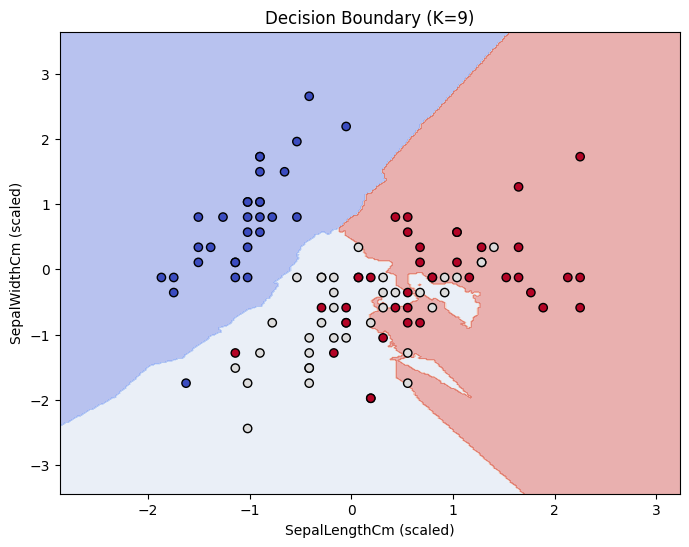

In [25]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel('SepalLengthCm (scaled)')
plt.ylabel('SepalWidthCm (scaled)')
plt.show()